In [1]:
#libraries used 
import numpy as np
import csv
import matplotlib.pyplot as plt
from cmath import phase

# ALL LIBRARIES TO CLASSIFY
#libraries used 
import numpy as np
import csv
import matplotlib.pyplot as plt
from cmath import phase

# ALL LIBRARIES TO CLASSIFY
import keras
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D,Flatten
from keras.layers import Dropout,MaxPooling1D,GlobalAveragePooling1D
from keras.layers import Input, GaussianNoise

Using TensorFlow backend.


In [2]:
# READ Data
def read_data(filename):
    X=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            X.append(row)
    X=np.array(X)
    return X

In [3]:
#IMPORT TRAIN DATA
data  =read_data( 'trainDataLabels.csv')

train = np.array(data[1:,1:101])
train = np.char.replace(train,'i','j').astype(np.complex)
# training data
x_train = []
for i in range (0,1000):
    x_train.append([train[i].real,train[i].imag])
        
x_train = np.array(x_train)
x_train = np.moveaxis(x_train, 1, -1)
print x_train.shape

num_classes=3
labelX   = np.array(map(int,data[1:,101])).astype(int)-1
print labelX.shape


(1000, 100, 2)
(1000,)


In [4]:
# IMPORT TEST DATA
data  =read_data( 'testData.csv')

test = np.array(data[1:,1:101])
test = np.char.replace(test,'i','j').astype(np.complex)
# testing data
x_test = []
for i in range (0,500):
    x_test.append([test[i].real,test[i].imag])
        
x_test = np.array(x_test)
x_test = np.moveaxis(x_test, 1, -1)
print x_test.shape

(500, 100, 2)


In [5]:
# Divide into the corresponding classes

# class1 QPSK
# class2 16QAM
# class3 64-QAM

class1=[]
class2=[]
class3=[]
for i in range(0,len(labelX)):
      
    if labelX[i] == 0:
      class1.append(train[i])

    if labelX[i] == 1:
      class2.append(train[i])
    
    if labelX[i] == 2:
      class3.append(train[i])

class1=np.array(class1)
class2=np.array(class2)
class3=np.array(class3)

print class1.shape
print class2.shape
print class3.shape

(322, 100)
(338, 100)
(340, 100)


In [6]:
# QPSK

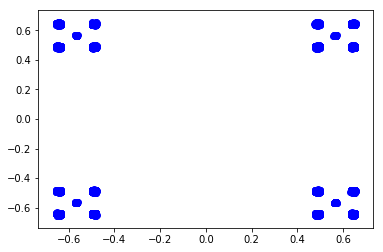

In [7]:
plt.scatter(class1.real,class1.imag,c='blue')
plt.show()

In [8]:
# 16QAM

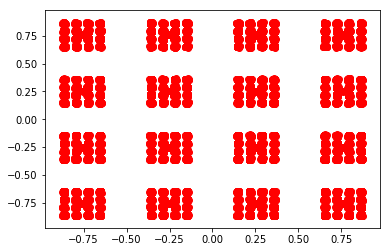

In [9]:
plt.scatter(class2.real,class2.imag,c='red')
plt.show()

In [10]:
# 64QAM

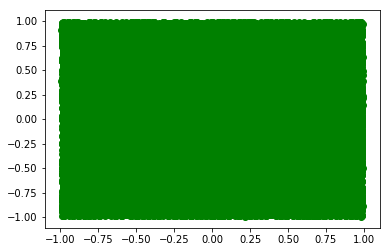

In [11]:
plt.scatter(class3.real,class3.imag,c='green')
plt.show()

In [12]:
# convert class vectors to binary class matrices
labelX = keras.utils.to_categorical(labelX, num_classes)
print labelX
print x_train.shape

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
(1000, 100, 2)


In [ ]:
from keras.models import Sequential

from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

np.random.seed(7)

model = Sequential()
model.add(LSTM(64, input_shape=(100, 2)))

# model.add(Dense(64, activation='relu'))

# model.add(GaussianNoise(stddev=0.001)) 

# model.add(GlobalAveragePooling1D())

model.add(Dropout(0.5))

# model.add(GaussianNoise(stddev=0.001)) 

# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))

# model.add(GaussianNoise(stddev=0.001))

# model.add(Dense(512, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model summary
model.summary()

# Fit the model
model.fit(x_train, labelX, epochs=120, validation_split=0.1, batch_size=50)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17152     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 17,347
Trainable params: 17,347
Non-trainable params: 0
_________________________________________________________________
Train on 900 samples, validate on 100 samples
Epoch 1/120
900/900 [==============================] - 4s 5ms/step - loss: 1.0995 - acc: 0.3367 - val_loss: 1.0993 - val_acc: 0.3400
Epoch 2/120
900/900 [==============================] - 2s 3ms/step - loss: 1.0969 - acc: 0.3911 - val_loss: 1.0985 - val_acc: 0.3200
Epoch 3/120
900/900 [==============================] - 2s 3ms/step - loss: 1.0948 - acc: 0

In [ ]:
# evaluate the model
scores = model.evaluate(x_train, labelX)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred=model.predict(x_test)

print y_pred

In [ ]:
#convert to labels
def predict(y):
    return np.argmax(y,axis=1)

y=predict(y_pred)+1

print y

In [ ]:
# saving

In [ ]:
f = open("Submission_CNN.csv", "w")
f.write('Id,Predicted Label\n')
for i in range(len(y_pred)):
    f.write("%d,%d\n"% (i+1 ,( y[i])))

f.close()